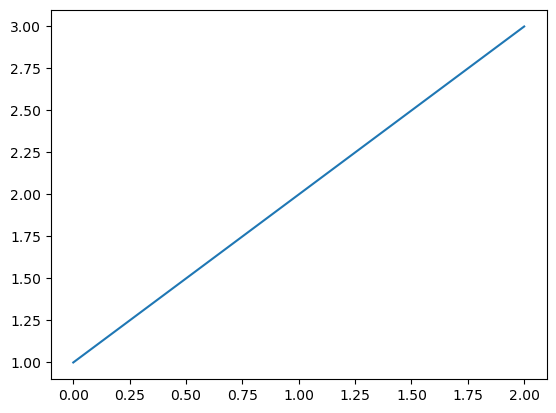

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3])

In [2]:
# conda install pytorch torchvision -c pytorch

In [3]:
import pandas as pd

In [4]:
# import torch

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD, Adam

In [7]:
from sklearn.datasets import make_moons
import numpy as np

In [8]:
X, y = make_moons(500,noise=0.1)
y_ = np.array([-1 if t == 0 else 1 for t in y])

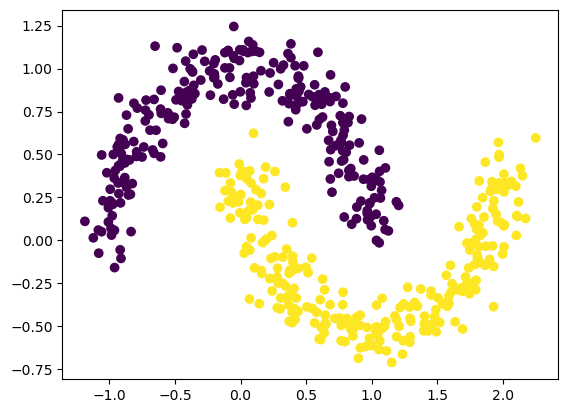

In [9]:
plt.scatter(X[:,0],X[:,1],c=y_)

In [10]:
class NeuralNet(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.lin_layer_1 = nn.Linear(2,20)
        self.lin_layer_2 = nn.Linear(20,40)
        self.lin_layer_3 = nn.Linear(40,20)
        self.lin_layer_4 = nn.Linear(20,1)
        self.relu = nn.ReLU()
        
    def forward(self,x):
        
        u = self.lin_layer_1(x)
        z = u.relu()
        u = self.lin_layer_2(z)
        z = u.relu()
        u = self.lin_layer_3(z)
        z = u.relu()
        u = self.lin_layer_4(z)
        
        output = F.sigmoid(u)
        
        return output
    
    def predict(self,A):
        with torch.no_grad():
            output = self(A)
            output = output.cpu().numpy()
            
            return np.array([0 if x < 0.5 else 1 for x in output])
    

In [11]:
print(torch.cuda.is_available())

False


In [12]:
# net = NeuralNet().cuda()
net = NeuralNet()
print(net)

NeuralNet(
  (lin_layer_1): Linear(in_features=2, out_features=20, bias=True)
  (lin_layer_2): Linear(in_features=20, out_features=40, bias=True)
  (lin_layer_3): Linear(in_features=40, out_features=20, bias=True)
  (lin_layer_4): Linear(in_features=20, out_features=1, bias=True)
  (relu): ReLU()
)


In [13]:
# nvcc --version

In [14]:
X_t = torch.from_numpy(X).to(torch.float)
y_t = torch.from_numpy(y).unsqueeze(1).to(torch.float)

# X_t = torch.from_numpy(X).to(torch.float).cuda()
# y_t = torch.from_numpy(y).unsqueeze(1).to(torch.float).cuda()

In [15]:
X_t.shape

torch.Size([500, 2])

In [16]:
y_t.shape

torch.Size([500, 1])

In [17]:
y_t

tensor([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
      

In [18]:
loss_fun = nn.BCELoss()
optimizer = SGD(net.parameters(),lr=0.1)

In [19]:
from torch.utils.data import TensorDataset, DataLoader

In [20]:
batch_size = 32
epochs = 100

In [21]:
training_set = TensorDataset(X_t,y_t)
data_loader = DataLoader(training_set,batch_size=batch_size,shuffle=True)

In [22]:
losses = []

for epoch in range(epochs):
    epoch_loss = 0.0
    
    for points, true_labels in data_loader:  
        # batch of 32 points and the labels
        
        predicted_labels = net(points) 
        #the output of the network, 32 values between 0 and 1
        
        loss = loss_fun(predicted_labels,true_labels)
        # the average over the batch of the losses
        # (1 - true_label) * log(1-predicted_label) 
        # + true_label*log(predicted_label)
        
        
        epoch_loss += loss 
        #adding the batch loss for each batch in the epoch
        
        optimizer.zero_grad()
        #the optimizer may have retained some gradients from previous
        #batches so we zero them so they don't interfere
        
        loss.backward()
        #this is the main computation, it computes the gradients for all
        #the parameters in the network
        
        optimizer.step()
        #once all the gradients are computed the optimizer updates the
        #parameters
        
    losses.append(epoch_loss.item())
    print(epoch_loss.item())

10.83487606048584
9.691097259521484
8.037691116333008
6.584510803222656
5.5009565353393555
4.947919845581055
4.474843978881836
4.118509769439697
3.883237361907959
3.6367037296295166
3.5019125938415527
3.3987929821014404
3.3286798000335693
3.039633274078369
2.8951022624969482
2.8284811973571777
2.807845115661621
2.4867048263549805
2.234839677810669
2.13441801071167
2.018850803375244
1.780633807182312
1.4808300733566284
1.319828987121582
1.097144365310669
1.053704857826233
0.890268087387085
0.8018461465835571
0.818189263343811
0.6237886548042297
0.5173982977867126
0.4790515899658203
0.43700239062309265
0.37449705600738525
0.36494511365890503
0.30669277906417847
0.27481067180633545
0.2396261990070343
0.23489265143871307
0.21397419273853302
0.1968129575252533
0.17401136457920074
0.16298018395900726
0.15752267837524414
0.15096372365951538
0.13561610877513885
0.13763074576854706
0.12350190430879593
0.12587164342403412
0.11034473776817322
0.11134225130081177
0.10242946445941925
0.100686267018

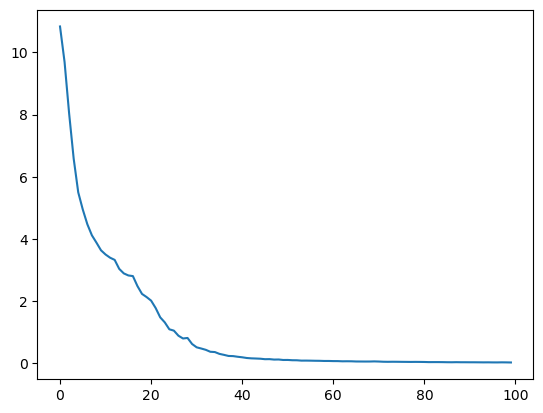

In [23]:
plt.plot(losses)

In [24]:
x_min,x_max = -1.5,2.5
y_min,y_max = -1.5, 1.5

xs = np.linspace(x_min,x_max,400)
ys = np.linspace(y_min,y_max,300)

xs,ys = np.meshgrid(xs,ys)
A = torch.from_numpy(np.array(list(zip(xs.ravel(),ys.ravel())))).to(torch.float)

In [25]:
#A is a tensor of 300 x 400 =120000 points in R^2
A.shape

torch.Size([120000, 2])

In [26]:
# Z = net.predict(A.cuda())
Z = net.predict(A)

In [27]:
Z = Z.reshape(xs.shape)

In [28]:
xs.shape

(300, 400)

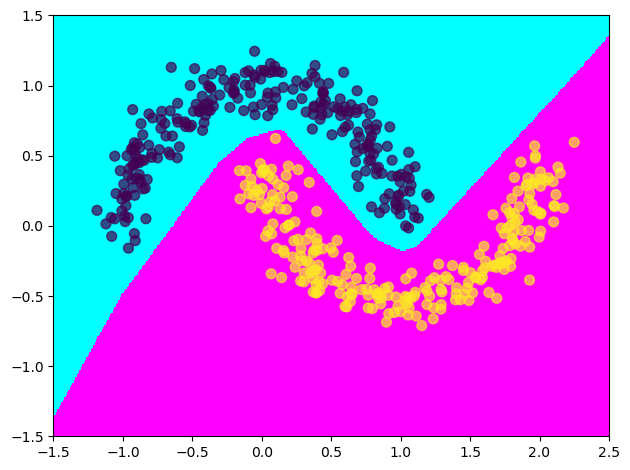

In [29]:
# in this image the trained network predicts the label (0 or 1) for each point
# in a 400-by-300 grid


plt.imshow(Z,cmap='cool',interpolation='nearest',
          extent = (x_min,x_max,y_min,y_max),aspect='auto',origin='lower')
plt.scatter(X[:,0],X[:,1],c=y_,alpha=0.7,s=50)
plt.tight_layout()

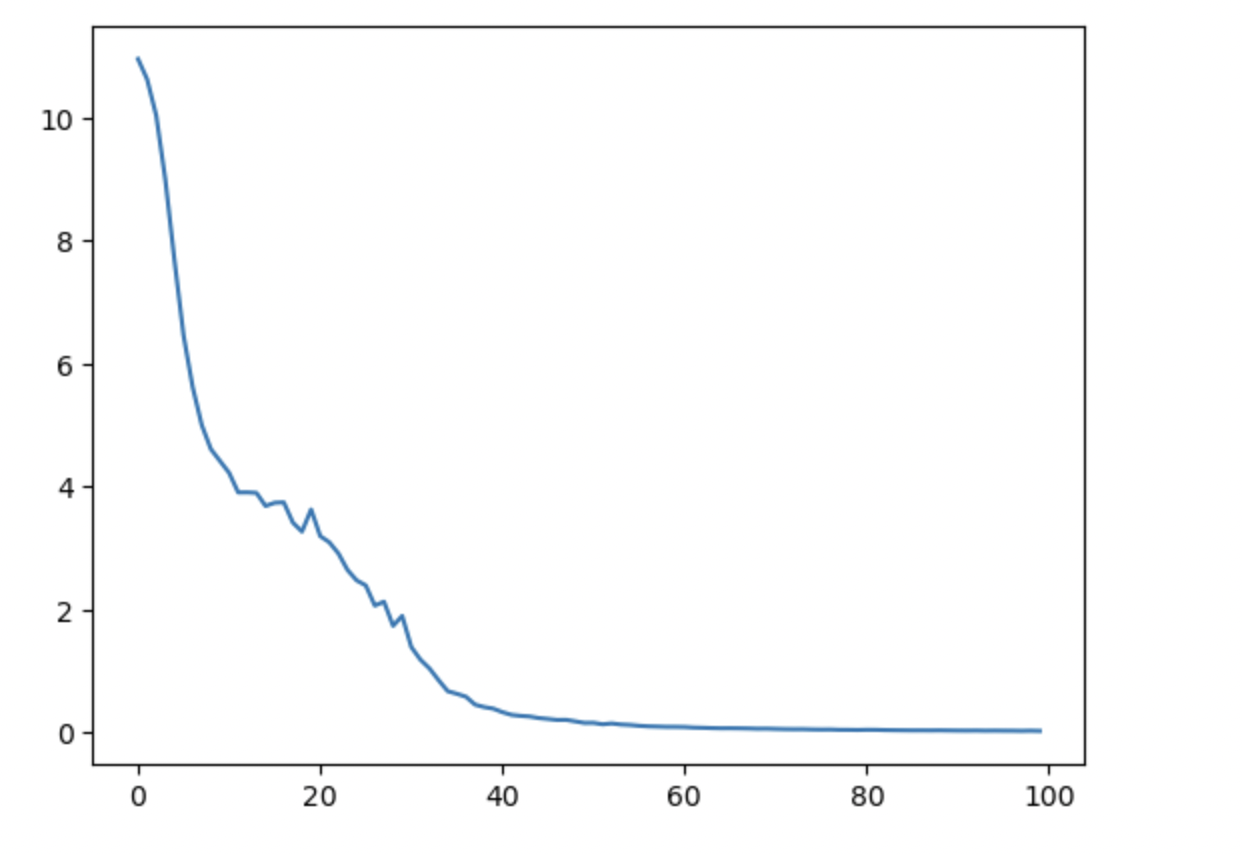

![Alt text](image.png)